In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
df = pd.read_csv('database/signals/1001.csv')
df.head()

,seconds,FHR,UC
0,0,150.50,7.0
1,1,150.50,8.5
2,2,151.00,8.5
3,3,151.25,7.5
4,4,151.25,9.5


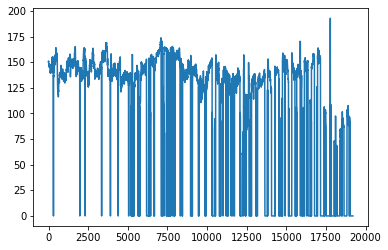

In [3]:
plt.plot(df['seconds'], df['FHR']);

In [4]:
  def power_spectrum(df, col):
    n = len(df)
    dt = 0.25 # sampling frequenc=y
    fhat = np.fft.fft(df[col], n) # Compute FFT
    PSD = fhat * np.conj(fhat) / n # Power spectrum
    freq = (1/(dt*n)) * np.arange(n) # Create X- axis of ferquencies
    L = np.arange(1, np.floor(n/15), dtype='int')

    fig, axs = plt.subplots(3,1, figsize=(25,15))
    plt.sca(axs[0])
    plt.plot(df['seconds'], df[col], label='Noisy')
    plt.legend()

    plt.sca(axs[1])
    plt.plot(freq[L], PSD[L])
    plt.xlim(freq[L[0]], freq[L[-1]])
    plt.title('Power Spectrum')
    #plt.show()

    indices = PSD > 0.00001 # finad all frequecies larger then power spectrum
    PSDclean = PSD * indices # zero out all other indices
    fhat = indices * fhat # zero out all fourier coff in Y
    ffilt = np.fft.ifft(fhat) # inverse FFT for filtered time signal

    plt.sca(axs[2])
    plt.plot(df['seconds'], ffilt, label='DeNoised')
    plt.legend()

    plt.show()

C:\Users\Anant Gupta\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Anant Gupta\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


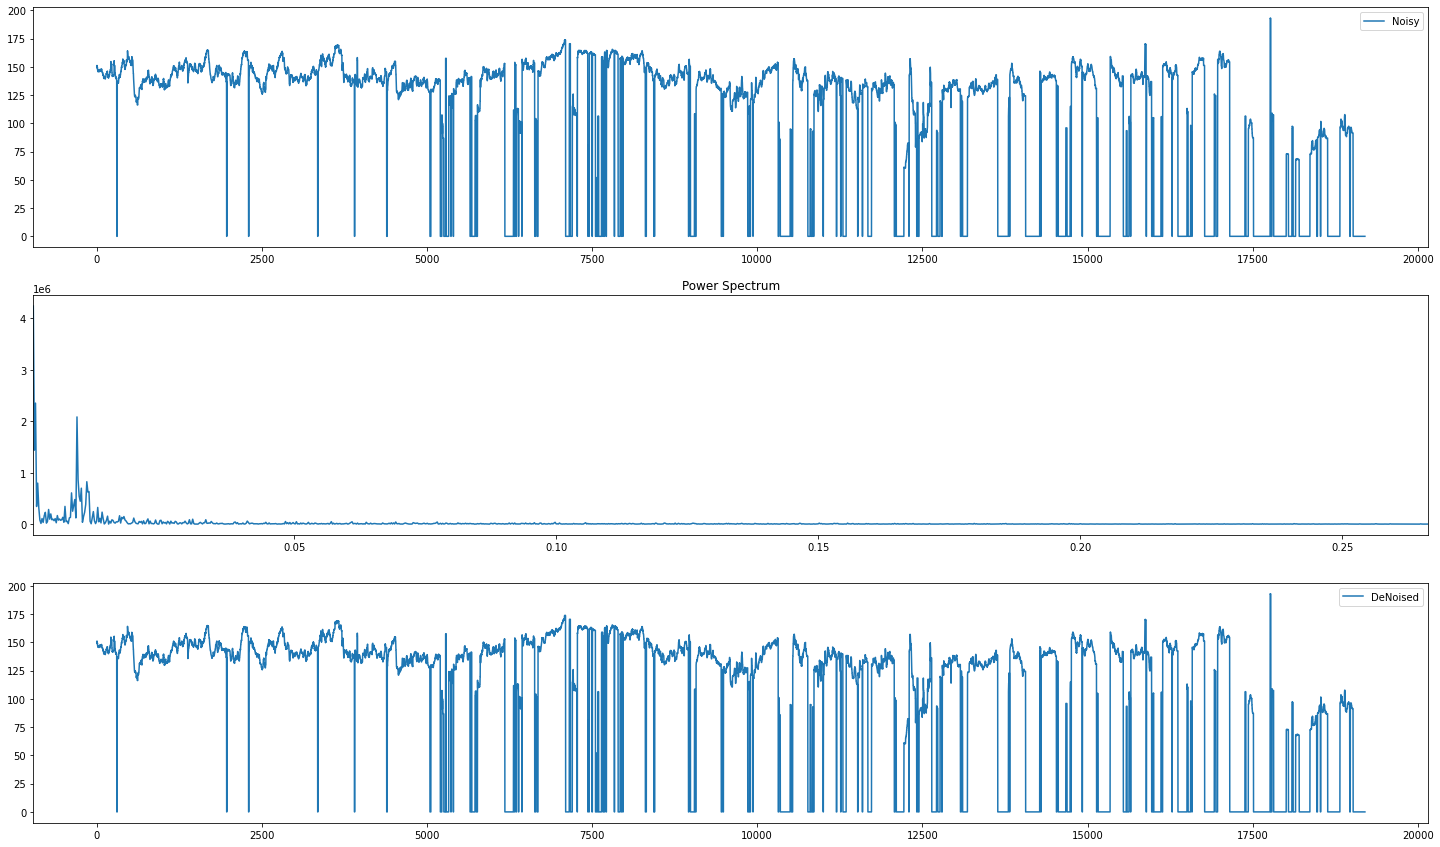

In [5]:
power_spectrum(df, 'FHR')

In [7]:
from scipy import interpolate

def f(x):
    x_points = df['seconds']
    y_points = df['FHR']

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)


In [8]:
df['FHR_denoised'] = df['FHR'].apply(lambda x: f(x) if x<=50 or x>=210 else x)

In [9]:
df.head()

,seconds,FHR,UC,FHR_denoised
0,0,150.50,7.0,150.50
1,1,150.50,8.5,150.50
2,2,151.00,8.5,151.00
3,3,151.25,7.5,151.25
4,4,151.25,9.5,151.25


In [10]:
def plot_interpolated_df(df):
    fig, axs = plt.subplots(2,1, figsize=(25,12))
    plt.sca(axs[0])
    plt.plot(df['seconds'], df['FHR'], label='Noisy')
    plt.legend()

    plt.sca(axs[1])
    plt.plot(df.seconds, df.FHR_denoised, label='DeNoised')
    plt.legend()

    plt.show()

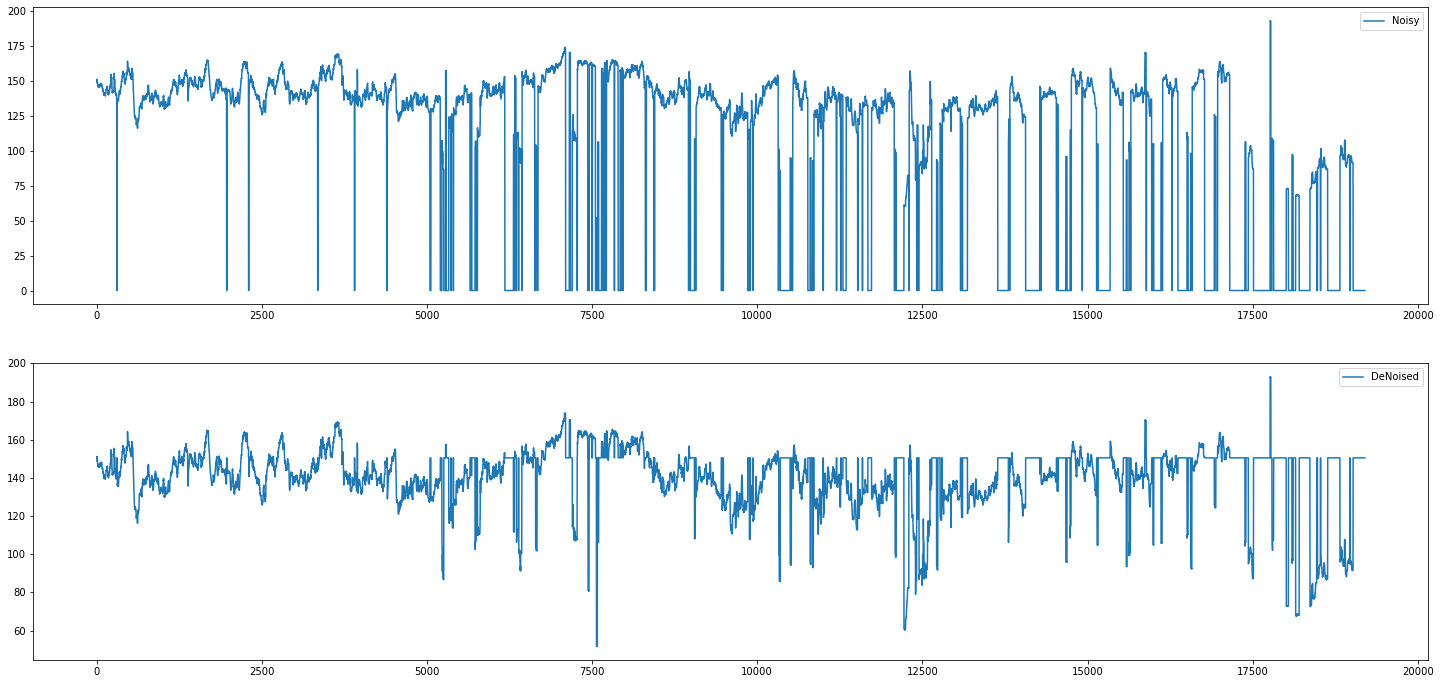

In [12]:
plot_interpolated_df(df)

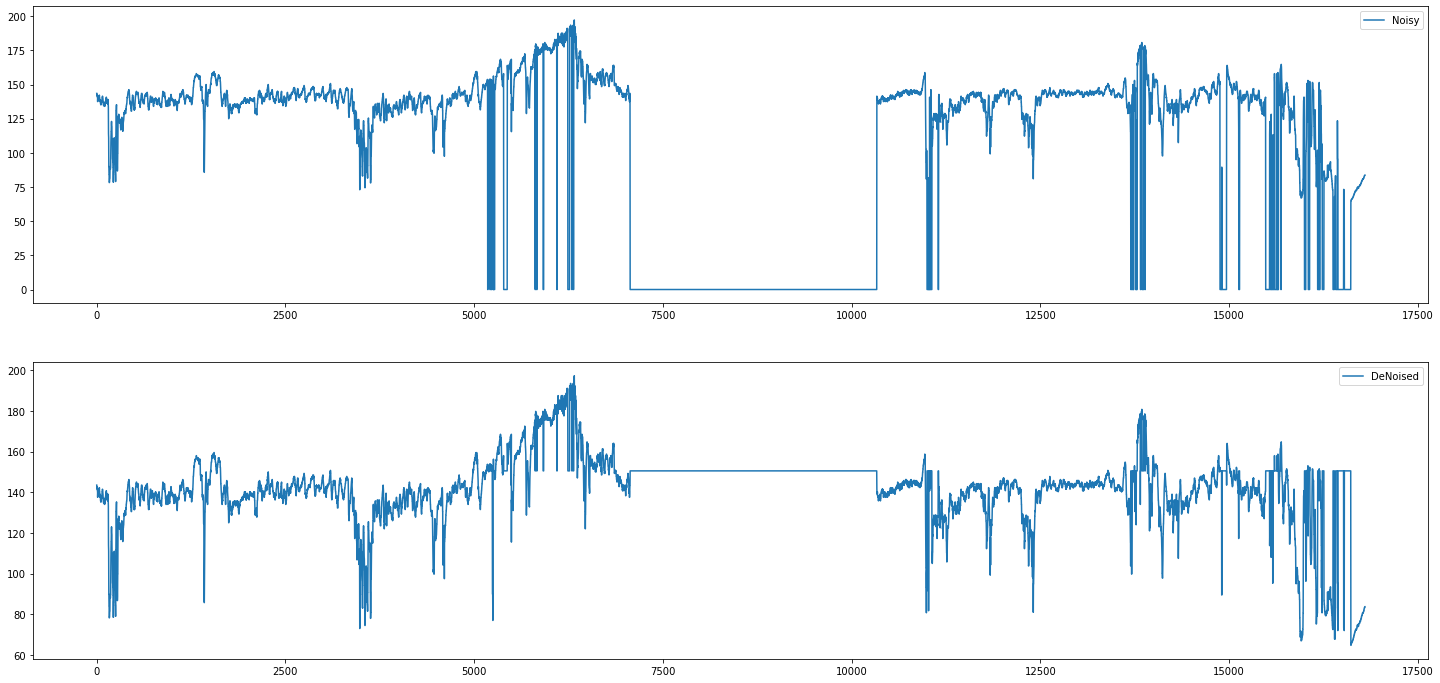

In [13]:
df2 = pd.read_csv(r'database\signals\1006.csv')
df2['FHR_denoised'] = df2['FHR'].apply(lambda x: f(x) if x<=50 else x)
plot_interpolated_df(df2)

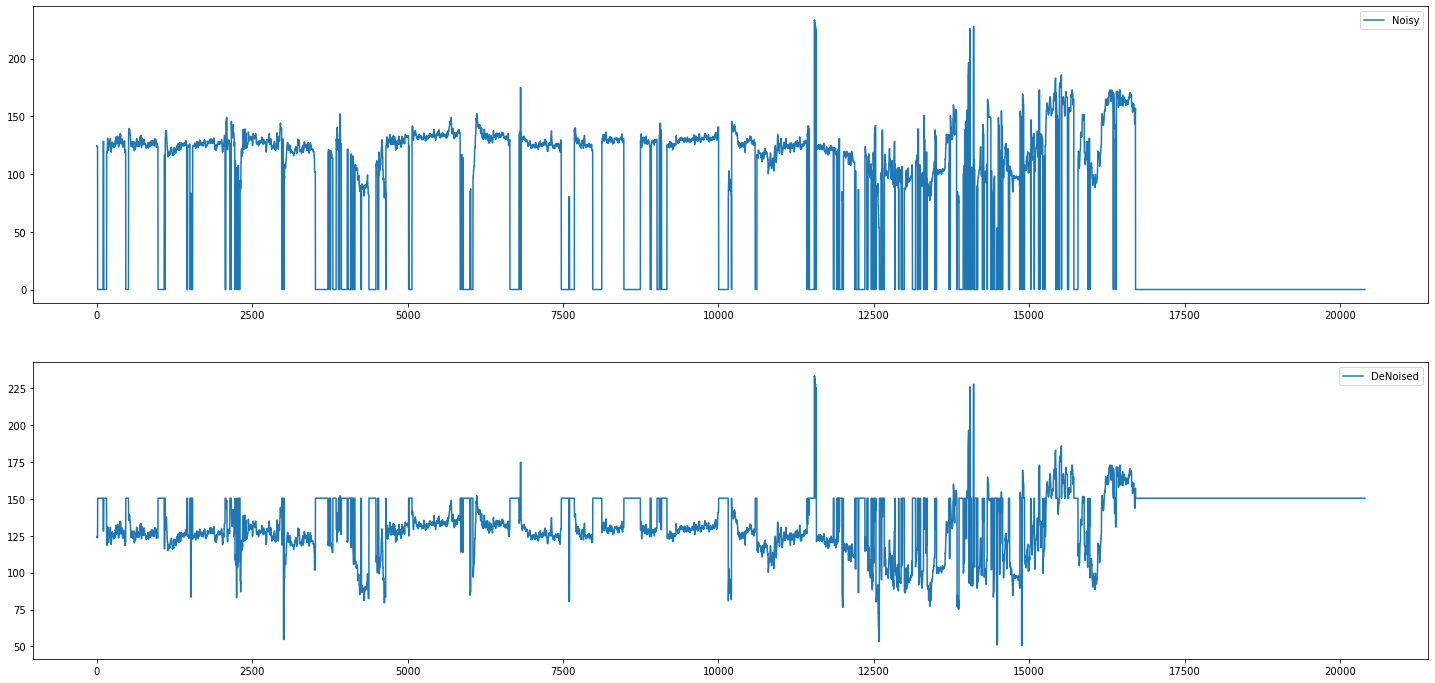

In [16]:
df3 = pd.read_csv(r'database\signals\2043.csv')
df3['FHR_denoised'] = df3['FHR'].apply(lambda x: f(x) if x<=50 else x)
plot_interpolated_df(df3)

C:\Users\Anant Gupta\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Anant Gupta\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


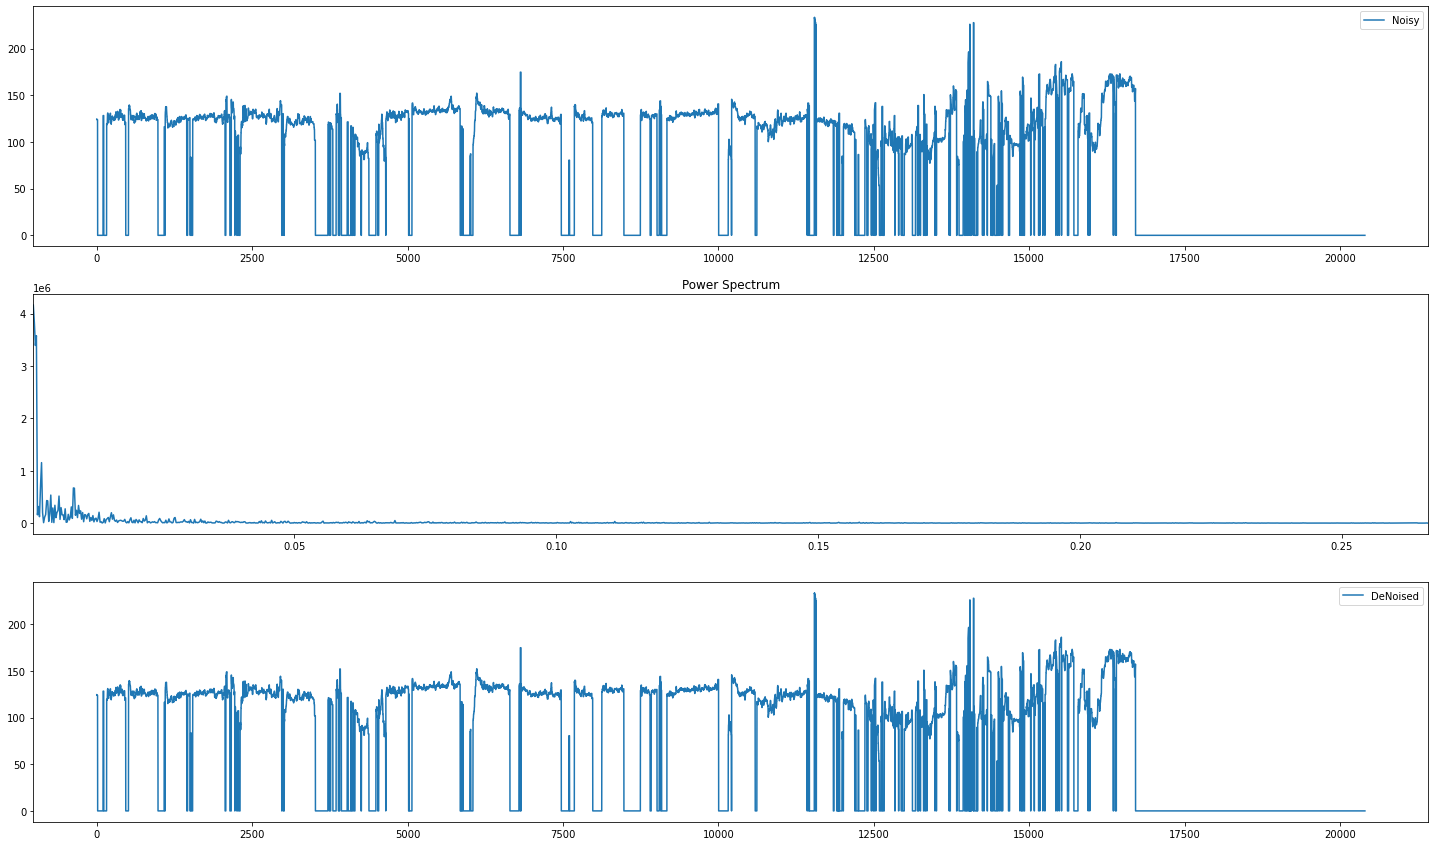

In [25]:
power_spectrum(df3, 'FHR')